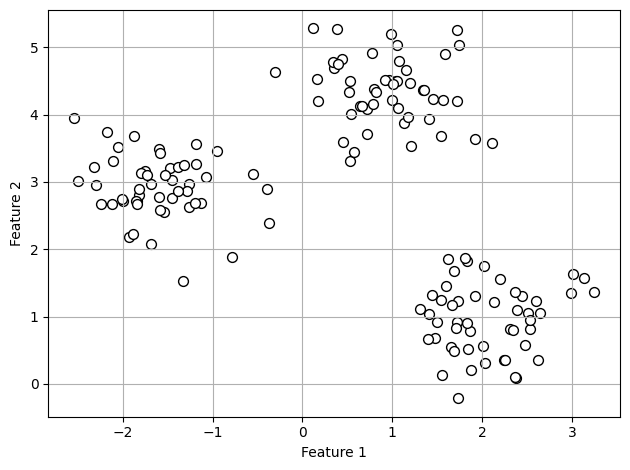

In [12]:
# visualize dataset for clustering

from sklearn.datasets import make_blobs

X, y, = make_blobs( n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

import matplotlib.pyplot as plt

plt.scatter( X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.grid()
plt.tight_layout()
plt.show()

In [13]:
# use Kmeans from sklearn

from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)

y_km = km.fit_predict( X )

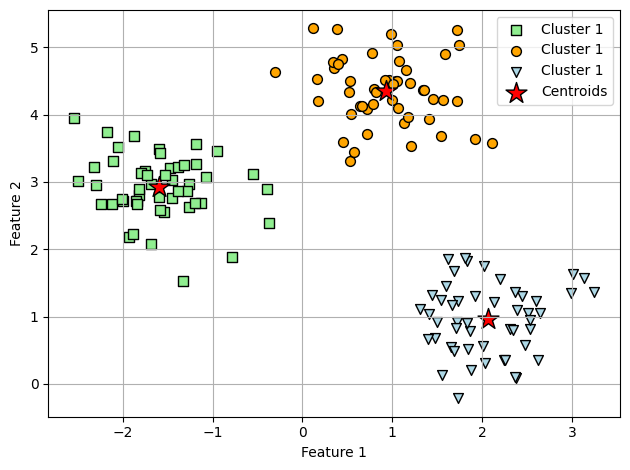

In [14]:
# visualize clusters that kmeans identifies

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 1')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 1')

plt.scatter( km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='Centroids' )

plt.xlabel( 'Feature 1' )
plt.ylabel( 'Feature 2' )

plt.legend( scatterpoints=1 )

plt.grid()
plt.tight_layout()
plt.show()

In [15]:
# inertia that shows within cluster SSE

print(f'Distortion: {km.inertia_:.2f}')

Distortion: 72.48


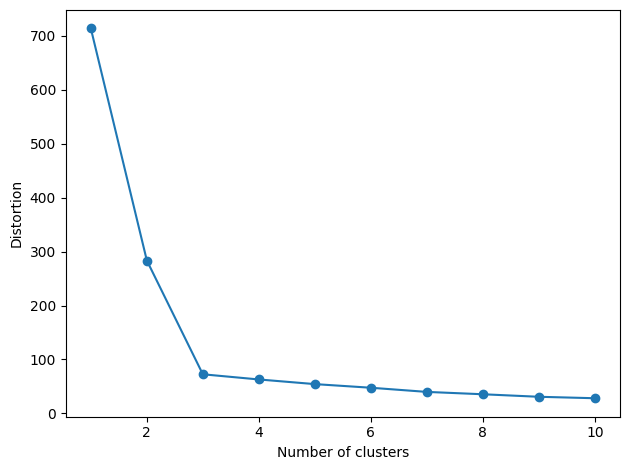

In [16]:
# plot distortions for different values of k

distortions = []

for i in range(1, 11):
    km = KMeans( n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)

    km.fit(X)

    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')

plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

plt.tight_layout()
plt.show()

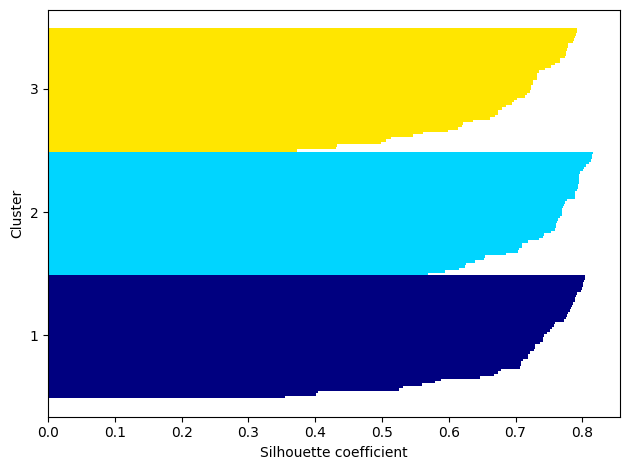

In [17]:
# plot silhouette coefficients for a k-means clusterings with k=3

km = KMeans( n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0 )

y_km = km.fit_predict( X )

import numpy as np
from matplotlib import cm

from sklearn.metrics import silhouette_samples

cluster_labels = np.unique( y_km )

n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples( X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0

yticks = []

for i, c in enumerate( cluster_labels ):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()

    y_ax_upper += len( c_silhouette_vals )

    color = cm.jet( float( i ) / n_clusters )

    plt.barh( range( y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)

    yticks.append( (y_ax_lower + y_ax_upper ) / 2. )

    y_ax_lower += len( c_silhouette_vals )

silhouette_avg = np.mean( silhouette_vals )

plt.yticks( yticks, cluster_labels + 1)

plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

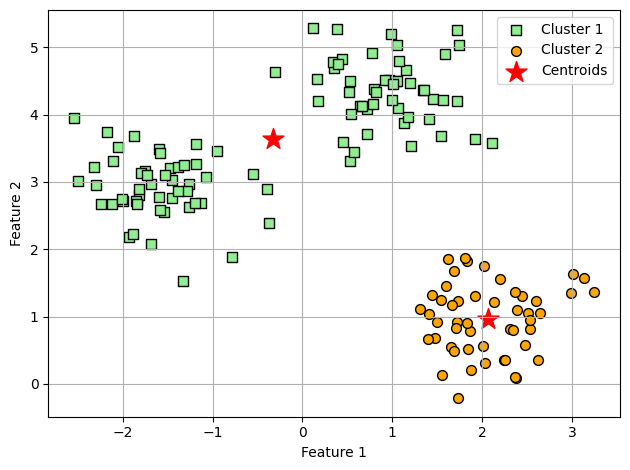

In [18]:
# silhouette plot for bad clustering

km = KMeans( n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0 )

y_km = km.fit_predict( X )

plt.scatter(X[ y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', edgecolor='black', marker='s', label='Cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', edgecolor='black', marker='o', label='Cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

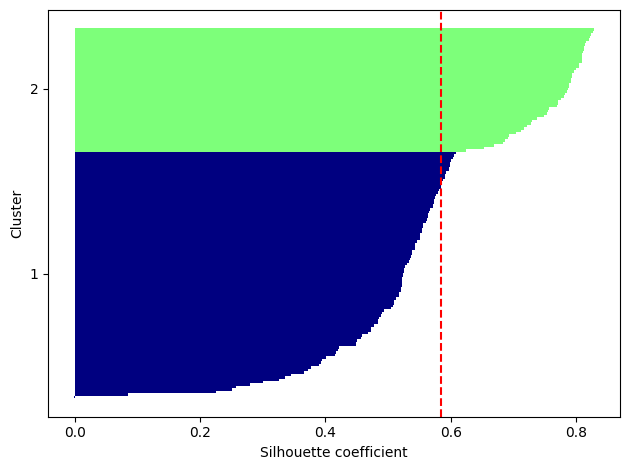

In [19]:
# silhouette plots to evaluate results

cluster_labels = np.unique( y_km )
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples( X, y_km, metric='euclidean' )

y_ax_lower, y_ax_upper = 0, 0

yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len( c_silhouette_vals )
    color = cm.jet(float(i) / n_clusters )
    plt.barh( range( y_ax_lower, y_ax_upper ), c_silhouette_vals, height=1.0, edgecolor='none', color=color )

    yticks.append( ( y_ax_lower + y_ax_upper ) / 2. )

    y_ax_lower += len( c_silhouette_vals )

silhouette_avg = np.mean( silhouette_vals )
plt.axvline( silhouette_avg, color='red', linestyle='--')

plt.yticks( yticks, cluster_labels + 1 )

plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

In [21]:
# generate random data for testing cluster linkage

import pandas as pd

import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']

labels = [ 'ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4' ]

X = np.random.random_sample( [ 5, 3] ) * 10

df = pd.DataFrame(X, columns=variables, index=labels)

df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [23]:
# create distance matrix

from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame( squareform( pdist( df, metric='euclidean')), columns=labels, index=labels )

row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [24]:
from scipy.cluster.hierarchy import linkage

help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

In [25]:
# incorrect approach using squareform distance matrix

row_clusters = linkage( row_dist, method='complete', metric='euclidean')

C:\Users\Andrew Solis\AppData\Local\Temp\ipykernel_25020\678253390.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  row_clusters = linkage( row_dist, method='complete', metric='euclidean')


In [26]:
# correct approach using condensed distance matrix 

row_clusters = linkage( pdist( df, metric='euclidean' ), method='complete' )

In [27]:
# Also correct using complete input example matrix( design matrix ) 

row_clusters = linkage( df.values, method='complete', metric='euclidean' )

In [28]:
# show results in pandas dataframe

pd.DataFrame( row_clusters, 
              columns = [ 'row label 1', 'row label 2', 'distance', 'no. of items in clust.'], 
              index = [f'cluster {(i + 1)}' for i in range( row_clusters.shape[0] ) ] )

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


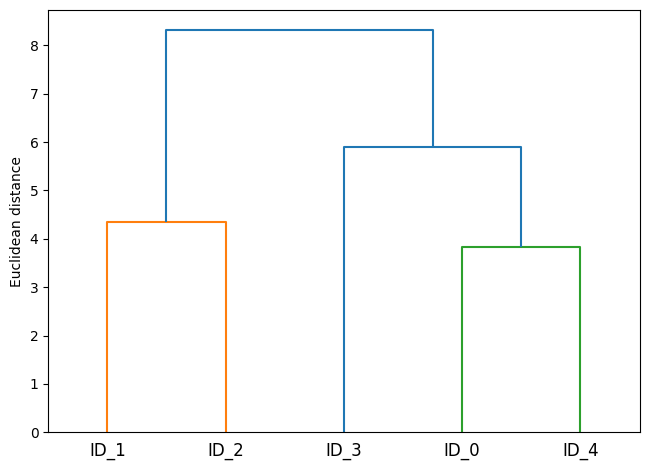

In [29]:
# visualize results in form of dendrogram

from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram( row_clusters, labels=labels )

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

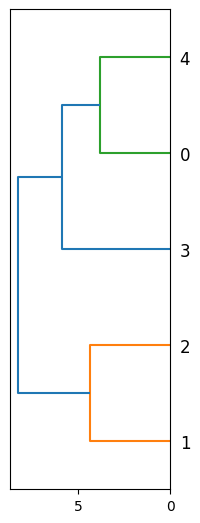

In [40]:
# Attach dendogram to heatmap

# 1. create new figure and define x axis position, y axis, width and height of dendrogram
#    and also rotate 90 degrees counterclockwise

fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# note: for matplotlib < v1.5.1, please use orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')

C:\Users\Andrew Solis\AppData\Local\Temp\ipykernel_25020\2347264065.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels([''] + list(df_rowclust.columns))
C:\Users\Andrew Solis\AppData\Local\Temp\ipykernel_25020\2347264065.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels([''] + list(df_rowclust.index))


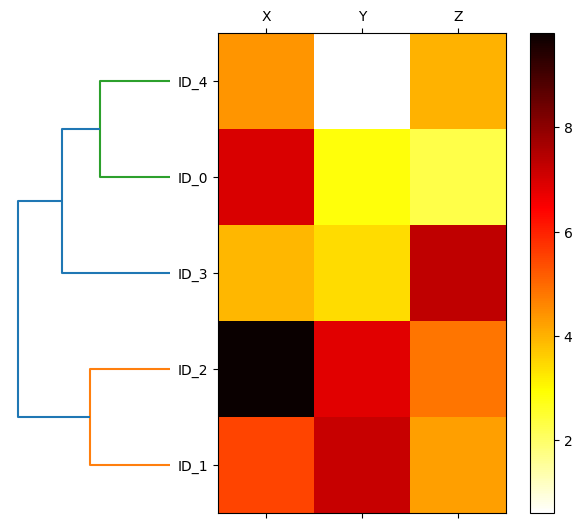

In [44]:
# plot row dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# note: for matplotlib < v1.5.1, please use orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')

# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
    i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)

axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

#plt.savefig('figures/10_12.png', dpi=300)
plt.show()

In [46]:
# Use sklearn AgglomerativeClustering for performing such clustering using euclidean distance

from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering( n_clusters=3, linkage='complete' )

labels = ac.fit_predict( X )

print(f'Cluster labels: {labels}')

Cluster labels: [1 0 0 2 1]


In [47]:
# rerun agglomerativeclustering using 2 clusters

ac = AgglomerativeClustering( n_clusters=2, linkage='complete' ) 

labels = ac.fit_predict( X )
print(f'Cluster labels: {labels}')

Cluster labels: [0 1 1 0 0]


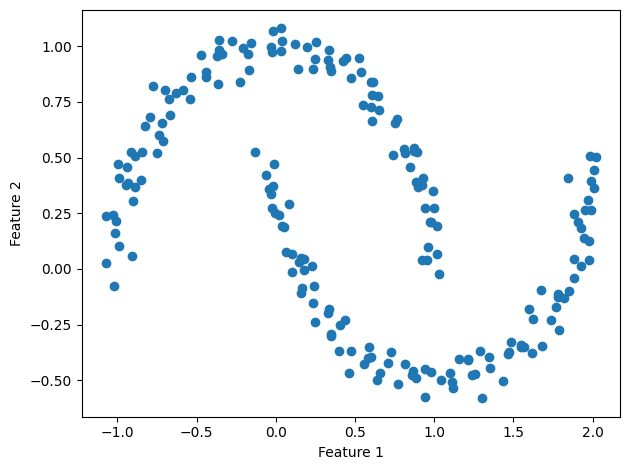

In [48]:
# create dataset to compare k-means clustering, hierarchical clustering, and DBSCAN

from sklearn.datasets import make_moons

X, y = make_moons( n_samples=200, noise=0.05, random_state=0 )

plt.scatter( X[:, 0], X[:, 1 ] )

plt.xlabel( 'Feature 1' )
plt.ylabel( 'Feature 2' )

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


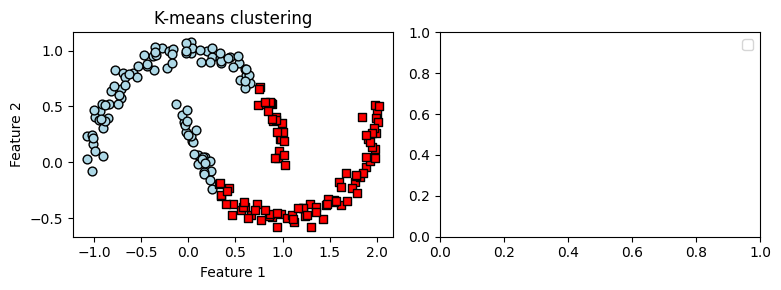

In [58]:
# try using k-means and complete linkage to test linkage

f, ( ax1, ax2 ) = plt.subplots( 1, 2, figsize=(8, 3) )

km = KMeans( n_clusters=2, random_state=0 )

y_km = km.fit_predict( X )

ax1.scatter( X[ y_km == 0, 0 ], X[ y_km == 0, 1 ], c='lightblue', edgecolor='black', marker='o', s=40, label='cluster 1' )
ax1.scatter( X[ y_km == 1, 0 ], X[ y_km == 1, 1 ], c='red', edgecolor='black', marker='s', s=40, label='cluster 2')

ax1.set_title( 'K-means clustering' )
ax1.set_xlabel( 'Feature 1' )
ax1.set_ylabel( 'Feature 2' )

ac = AgglomerativeClustering( n_clusters=2, linkage='complete' )

y_ac = ac.fit_predict( X )

ax2.scatter( X[ y_ac == 0, 0 ], X[ y_ac == 0, 1 ], c='lightblue', edgecolor='black', marker='o', s=40, label='cluster 1' )
ax2.scatter( X[ y_ac == 1, 1 ], X[ y_ac == 1, 1 ], c='red',       edgecolor='black', marker='s', s=40, label='cluster 2' )

ax2.set_title( 'AgglomerativeClustering' )

ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

plt.legend()
plt.tight_layout()

plt.show()
